# Paper Figures

Authors:  
Simone Orioli  | simone.orioli@nbi.ku.dk  
Felix K&uuml;mmerer | felix.kummerer@bio.ku.dk 

In [1]:
import ABSURDer as absurder
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as scs
import mdtraj as md

The results of the manuscript have been obtained in slighlty different conditions with respect to the ones in the `absurder_example.ipynb` notebook. For all the different examples, we used a more extended range of `thetas` and ignored `Ala146` from the analysis (methyl 14 in the dataset). The following blocks of code will reproduce the scatter plots in Fig. 2,3 and 4 of Ref. [1]. The calculations in each block will take around 1h. Therefore, we also provide the precomputed results. To run the minimization anyway, uncomment `rw.reweight` and comment `rw.load_results`.   
In order to use advanced functionalities of the class, we suggest to load the list with the name of the methyls. In this way, the spectral densities and rotamer distributions will be properly numbered. ATTENTION: the list of methyls is assumed to be loaded in the same order as the rates, so we suggest to use the one provided as an output in `specdens_mapping.py`. 

Information used identically in all the blocks

In [2]:
labels     = [ r'($D_z$)', r'($D_y$)', r'($3D_z^2-2$)' ]
thetas     = np.concatenate( ( np.array([0, 50]), np.arange( 100, 1500, 100 ), np.arange( 1500, 8500, 500 ) ) )
ntrajs     = 3 
block_size = 1000
nblocks    = 1500
len_traj   = int( nblocks/ntrajs )
wd         = 145.858415

## Block Size Analysis

In [3]:
def rmsd( r, md, exp ):
    return np.sum( (exp[r] - md[r])**2 ) / np.shape(md)[-1]

md      = {}
lenghts = [ 2, 4, 6, 8, 10, 16, 20, 40, 60, 100, 250, 1000, 5000 ]
for l in lenghts:
    filename = f'block_length_analysis/rates_{l}_ns.pkl'
    pin = open( filename, "rb" )
    r = pickle.load(pin)
    md[l] = r
    
md_avg         = {}
md_std         = {}
md_std_avg     = {}
md_std_avg_avg = {}
yy             = []
rmsds          = []

for k in md.keys():
    md_avg[k] = np.average( md[k], axis = -1 )

for k in sorted( md.keys() ):
    md_std[k] = np.std( md[k], axis = -1 )
    md_std_avg[k] = np.average( md_std[k], axis = -1 )
    md_std_avg_avg[k] = 1. / np.average( md_std_avg[k], axis = -1 )
    md_std[k] /= np.sqrt( np.shape(md[k])[1] )
    yy.append( md_std_avg_avg[k] )
yy = np.array( yy )

for i in sorted(md_avg.keys()):
    tmp = []
    for r in range(3):
        tmp.append( rmsd( r, md_avg[i], md_avg[5000] ) )
    rmsds.append( np.sum( tmp )/3 )

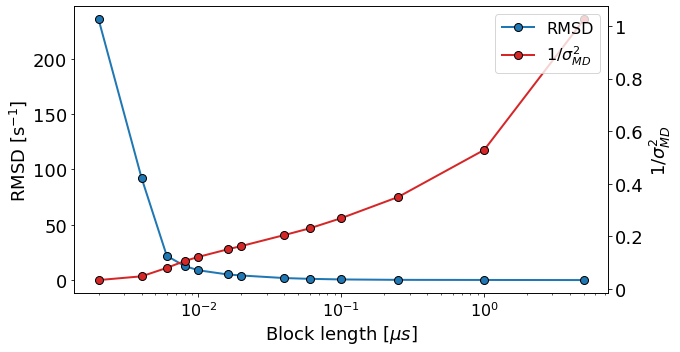

In [4]:
fig, ax1 = plt.subplots( figsize = [9.55,5] )

blenghts    = np.array( sorted(md_avg.keys()) )/1000
ax1_ylabels = [0,0, 50, 100, 150, 200, 300, 400]
ax2_ylabels = [0,0,.2,.4,.6,.8,1]

ax1.plot( blenghts, rmsds, lw = 2, marker = 'o', markersize = 8, markeredgecolor = 'k', label = r'RMSD' )
ax1.set_xlabel( r'Block length [$\mu s$]', fontsize = 18 )
ax1.set_ylabel( r'RMSD [s$^{-1}$]', fontsize = 18 )
ax1.set_yticklabels( labels = ax1_ylabels, fontsize = 18 )
ax1.set_xscale( 'log' )

ax2 = ax1.twinx() 
ax2.plot( blenghts, yy, c = 'tab:red', lw = 2, marker = 'o', markersize = 8, markeredgecolor = 'k', label = r'$ 1 / \sigma_{MD}^2 $' )
ax2.set_ylabel( r'$ 1 / \sigma_{MD}^2 $', fontsize = 18 )
ax2.set_yticklabels( labels = ax2_ylabels, fontsize = 18 )
fig.legend( loc = "upper right", bbox_to_anchor = (1,1), bbox_transform = ax1.transAxes, fontsize = 16 )

fig.tight_layout()
plt.show()

## Same Force Field

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  100
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 18.07
# Average shift:      0.09


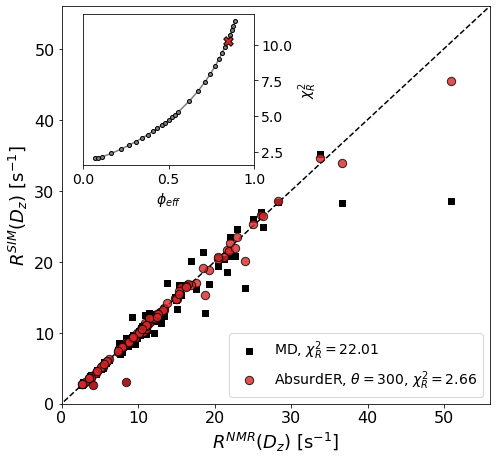

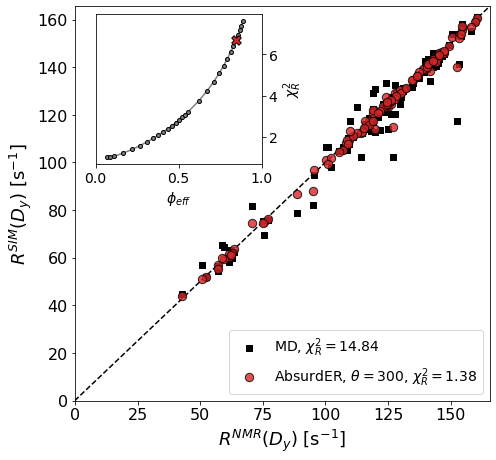

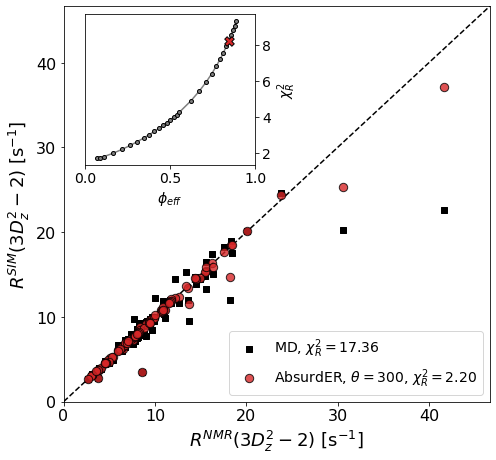

In [5]:
rex    = f'data/same_ff/nmr.npy'
rmd    = f'data/same_ff/md.npy'
out    = 'same_ff_results'
mlist  = 'methyls_lists/methyls_ff.pkl'
ala146 = [14]
rw     = absurder.ABSURDer( rex, rmd, out = out, thetas = thetas, idx = ala146, methyl_list = mlist )

#rw.reweight( -1 )
rw.load_results('weights/same_ff/same_ff.pkl')

opt_theta = 300
for i in range(rw.r):
    rw.plot_comparison( i, opt_theta, labels[i] )

Average weight of each trajectory, reported in Tab. 1 in the paper. 

In [6]:
opt_weights = rw.res[opt_theta]

traj1 = np.sum(opt_weights[:500])
traj2 = np.sum(opt_weights[501:1000])
traj3 = np.sum(opt_weights[1001:1500])

print( f'{traj1:.3f}, {traj2:.3f}, {traj3:.3f}' )

0.208, 0.487, 0.294


### Specral Densities 

In order to reproduce the remaining pictures in Fig. 2 in the paper, we can employ the `plot_specdens` and `plot_rotamer_distributions` functions. In order to use them, however, the outputs of `...` and `...` scripts are required. These are provided at the following link: `...`

In [7]:
rw.load_specdens( 'spectral_densities/exp_lvl1_spec.pkl', 'spectral_densities/exp_lvl1_Jome.pkl', 'spectral_densities/md_lvl1_spec.pkl' )

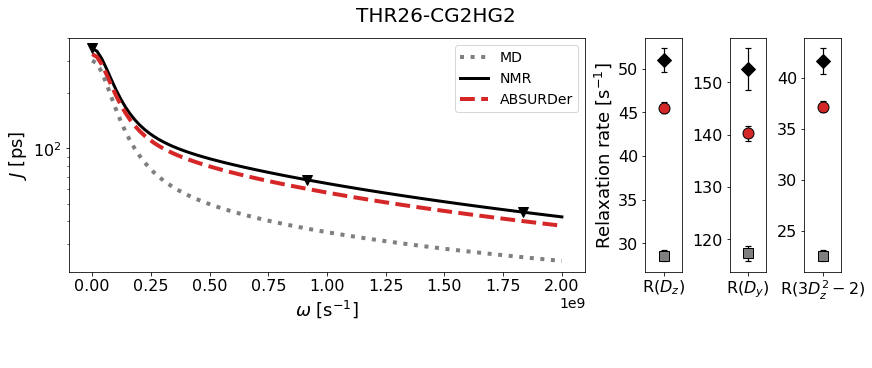

In [8]:
amino = 34 #THR26
rw.plot_specdens( amino, wd, opt_theta = opt_theta, rate_labels = labels, outfig = None )

### Rotamers

In [9]:
rw.load_rotamers('rotamers/same_ff_nmr.pkl', 'rotamers/same_ff_md.pkl', 'rotamers/same_ff_residues.pkl')

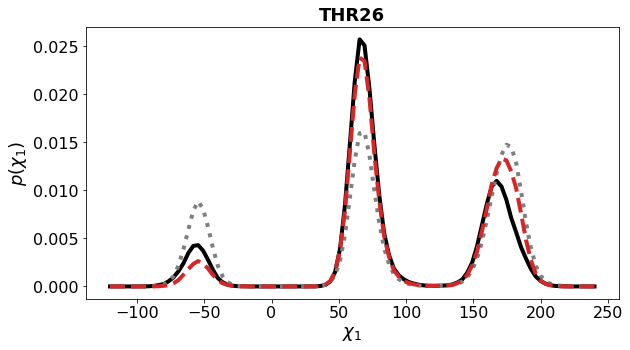

In [10]:
idx = 'THR26'
rw.plot_single_rotamer( idx, 0, nblocks, block_size, ntrajs, opt_theta )

### Rotamers Supplementary Figures

In [11]:
delta_phi = rw.phi_psi_rmsd( 2, nblocks, block_size, ntrajs, opt_theta )
delta_psi = rw.phi_psi_rmsd( 3, nblocks, block_size, ntrajs, opt_theta )

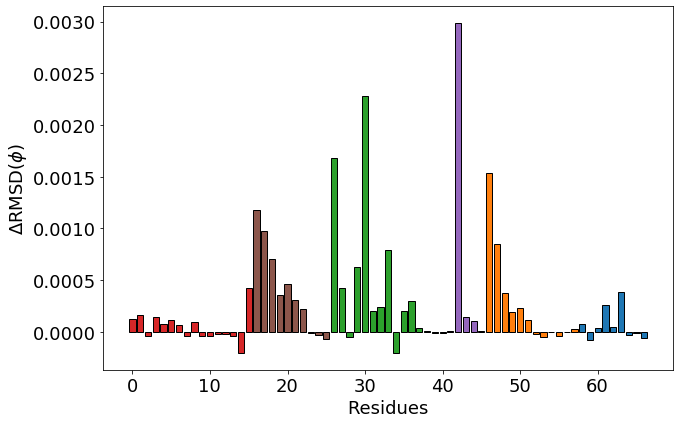

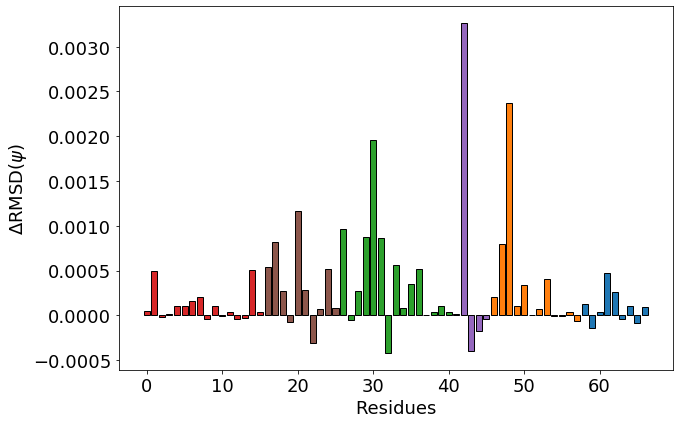

In [12]:
rw.plot_delta_rmsds( 2, delta_phi, r'$\phi$' )
rw.plot_delta_rmsds( 3, delta_psi, r'$\psi$' )

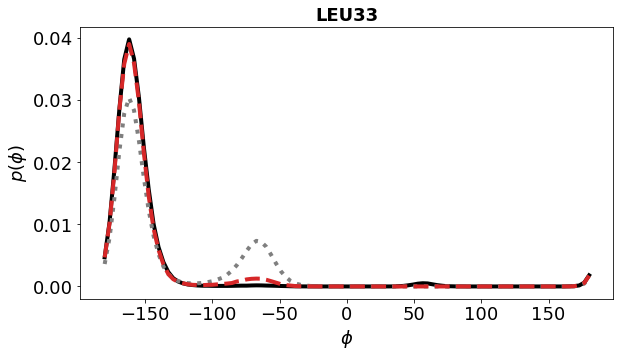

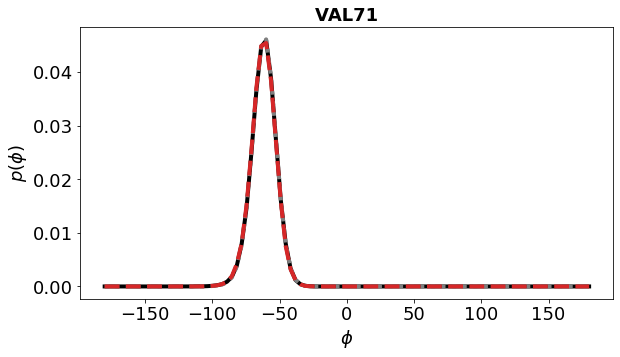

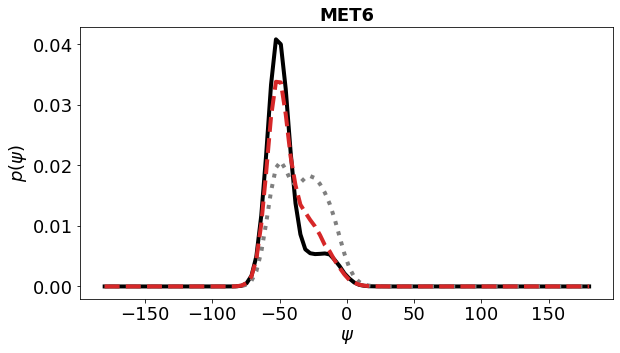

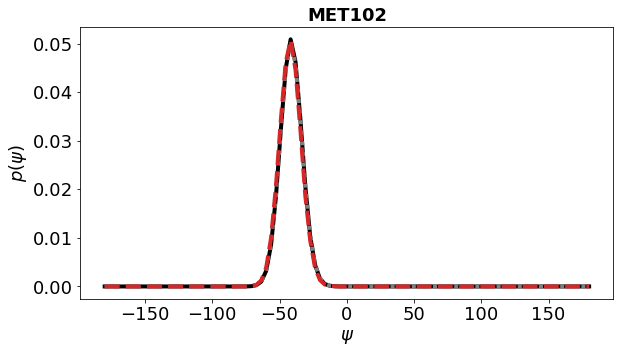

In [13]:
angs = [2, 2, 3, 3]
idxs = ['LEU33', 'VAL71', 'MET6', 'MET102']

for ang,idx in zip(angs,idxs):
    rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

### Reweighting Supplementary Figures

In [14]:
rex    = 'data/same_ff/nmr_onlynmr.npy'
rmd    = 'data/same_ff/md_onlynmr.npy'

rw = absurder.ABSURDer( rex, rmd, thetas = thetas )
rw.load_results('weights/same_ff/same_ff_onlynmr.pkl')

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  73
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 17.48
# Average shift:      0.01


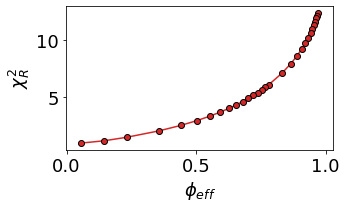

In [15]:
rw.plot_phix2r(-1)
phi_onlynmr = np.copy( rw.phi )
chi2_onlynmr = np.copy( rw.chi )

In [16]:
rex = 'data/same_ff/nmr_nonmr.npy'
rmd = 'data/same_ff/md_nonmr.npy'

rw = absurder.ABSURDer( rex, rmd, thetas = thetas )
rw.load_results('weights/same_ff/same_ff_onlynmr.pkl')

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  28
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 19.04
# Average shift:      0.17


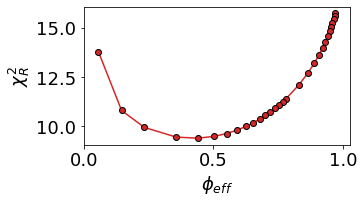

In [17]:
rw.plot_phix2r(-1)
phi_nonmr = np.copy( rw.phi )
chi2_nonmr = np.copy( rw.chi )

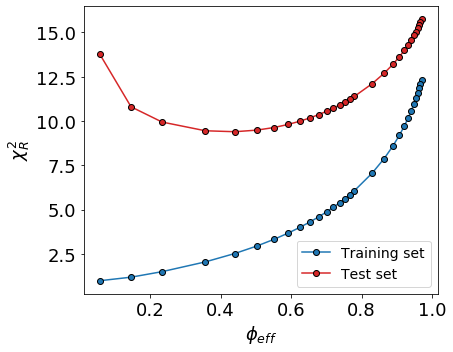

In [18]:
plt.figure( figsize = (6.4, 5) )
plt.plot( phi_onlynmr, chi2_onlynmr, 'o-', markeredgecolor = 'k', label = 'Training set' )
plt.plot( phi_nonmr,   chi2_nonmr,   'o-', markeredgecolor = 'k', label = 'Test set', c = 'tab:red',  )

plt.xlabel(r'$\phi_{eff}$')
plt.ylabel(r'$\chi^2_R$')
plt.legend()
plt.tight_layout()

## Different Force Fields

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  100
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 156.10
# Average shift:      0.22


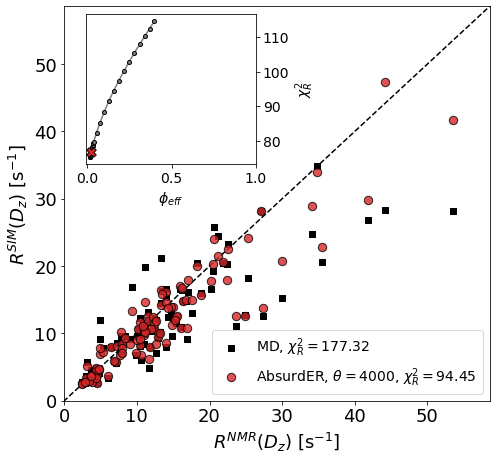

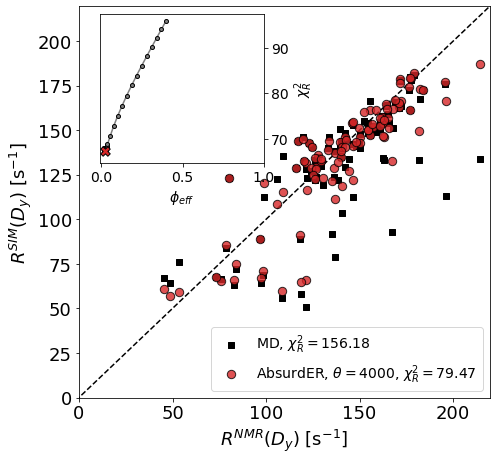

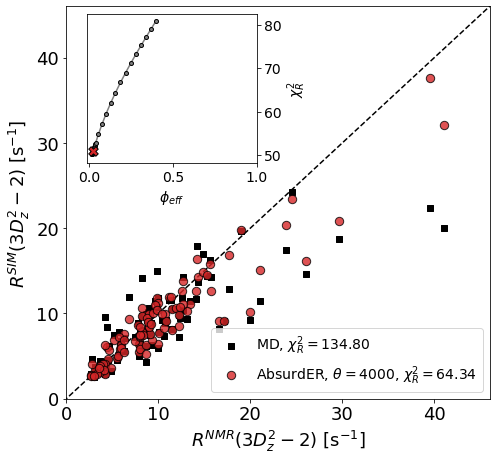

In [19]:
rex    = f'data/different_ff/nmr.npy'
rmd    = f'data/different_ff/md.npy'
out    = "different_ff_results"
mlist  = 'methyls_lists/methyls_ff.pkl'
ala146 = [14]

rw = absurder.ABSURDer( rex, rmd, out = out, thetas = thetas, idx = ala146, methyl_list = mlist )
#rw.reweight( -1 )
rw.load_results('weights/different_ff/different_ff.pkl')

opt_theta = thetas[-9]
for i in range(rw.r):
    rw.plot_comparison( i, opt_theta, labels[i] )

In [20]:
opt_weights = rw.res[opt_theta]

traj1 = np.sum( opt_weights[:500] )
traj2 = np.sum( opt_weights[501:1000] )
traj3 = np.sum( opt_weights[1001:1500] )

print( f'{traj1:.2f}, {traj2:.2f}, {traj3:.2f}' )

0.27, 0.44, 0.26


### 2D Rotamer Probability Distribution Functions

In order to reproduce the remaining pictures in Fig. 3 in the paper, we can employ the `plot_2d_rotamers` function.

In [21]:
rw.load_rotamers('rotamers/different_ff_nmr.pkl', 'rotamers/different_ff_md.pkl', 'rotamers/different_ff_residues.pkl')

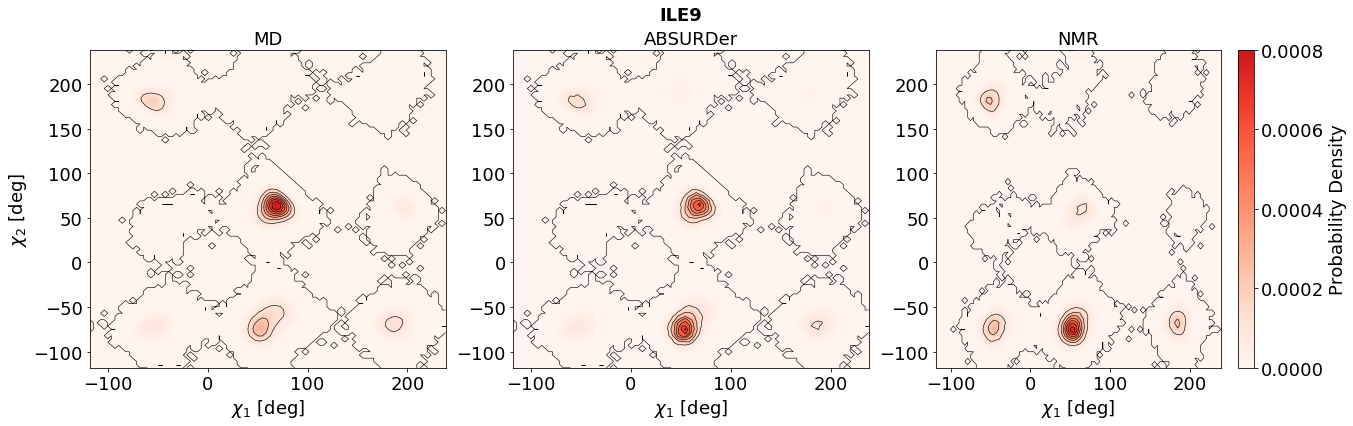

In [22]:
idx = 'ILE9'
hist_md, hist_rw, hist_ex = rw.plot_2d_rotamers( idx, nblocks, block_size, ntrajs, opt_theta, outfig = None )

#### Rotamers population shift upon reweighting

In [23]:
def plot_rectangle( conf, p ):
    plt.hlines( conf[2], conf[0], conf[1], color = 'w' )
    plt.hlines( conf[3], conf[0], conf[1], color = 'w' )
    plt.vlines( conf[0], conf[2], conf[3], color = 'w' )
    plt.vlines( conf[1], conf[2], conf[3], color = 'w' )
    plt.text(conf[0],conf[3]+1, f"{p:.2f}", color = 'w', fontweight = 'bold', fontsize = 14 )

In [24]:
def integrate_prob( h, conf ):
    norm = np.sum(h)
    s = np.sum( h[conf[0]:conf[1],conf[2]:conf[3]])
    return s/norm

Regions in rotamer space around which probability density maxima are located.

In [25]:
confs = [
   [10,30,5,25], [10,30,75,95], [40,60,75,95], [40,60,40,60], 
    [40,60,2,30], [75,95,40,60], [75,95,75, 95], [75,95,2,30]
]

NMR populations

Check: 0.99~1?


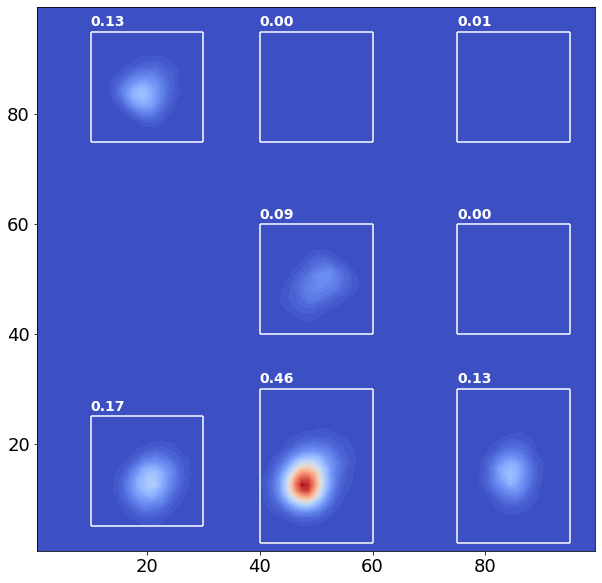

In [26]:
plt.figure( figsize = (10,10))
plt.contourf( hist_ex.T, 50, cmap = 'coolwarm', origin='lower' )

ptot = 0
for conf in confs:
    p = integrate_prob( hist_ex, conf )
    plot_rectangle( conf, p )
    ptot += p
    
print( f"Check: {ptot:.2f}~1?" )

MD populations

Check: 0.99~1?


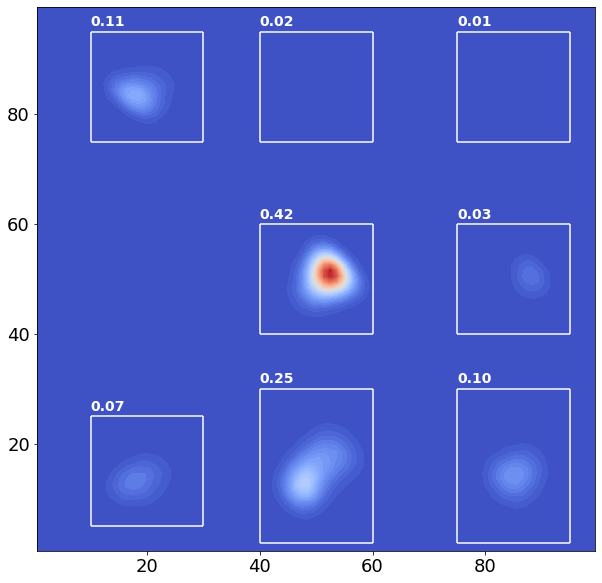

In [27]:
plt.figure( figsize = (10,10))
plt.contourf( hist_md.T, 50, cmap = 'coolwarm', origin='lower' )

ptot = 0
for conf in confs:
    p = integrate_prob( hist_md, conf )
    plot_rectangle( conf, p )
    ptot += p
    
print( f"Check: {ptot:.2f}~1?" )

Reweighted populations

Check: 0.99~1?


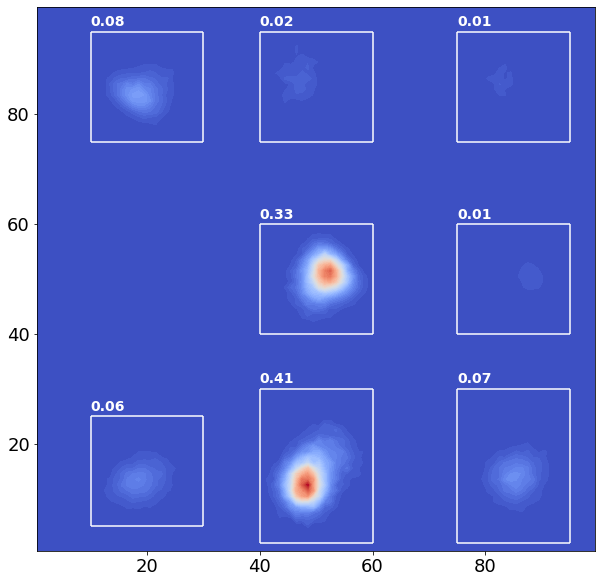

In [28]:
plt.figure( figsize = (10,10))
plt.contourf( hist_rw.T, 50, cmap = 'coolwarm', origin='lower' )

ptot = 0
for conf in confs:
    p = integrate_prob( hist_rw, conf )
    plot_rectangle( conf, p )
    ptot += p
    
print( f"Check: {ptot:.2f}~1?" )

### Rotamers Supplementary Figure

In [29]:
delta_phi = rw.phi_psi_rmsd( 2, nblocks, block_size, ntrajs, opt_theta )
delta_psi = rw.phi_psi_rmsd( 3, nblocks, block_size, ntrajs, opt_theta )

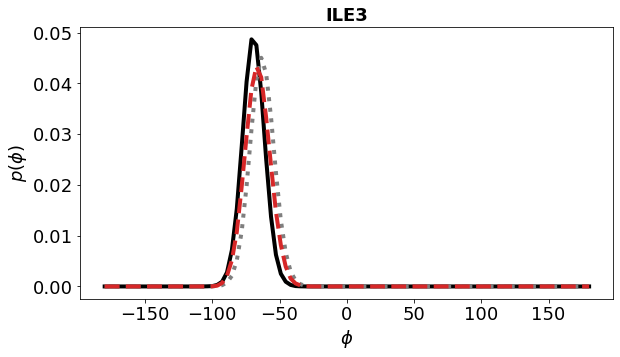

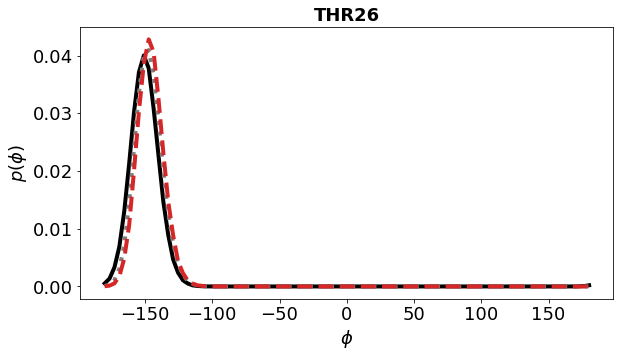

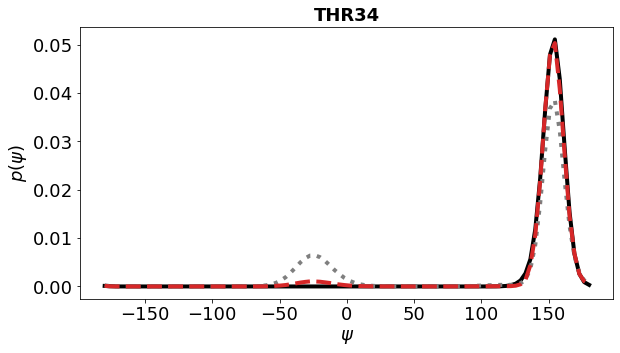

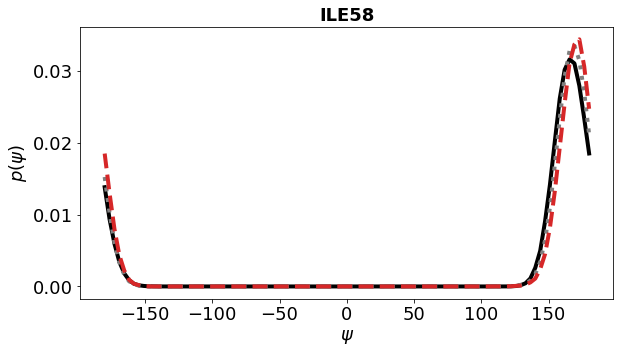

In [30]:
angs = [2, 2, 3, 3]
idxs = ['ILE3', 'THR26', 'THR34', 'ILE58']

for ang,idx in zip(angs,idxs):
    rw.plot_single_rotamer( idx, ang, nblocks, block_size, ntrajs, opt_theta )

### Reweighting Supplementary Figures

In [31]:
rex = 'data/different_ff/nmr_onlynmr.npy'
rmd = 'data/different_ff/md_onlynmr.npy'

rw = absurder.ABSURDer( rex, rmd, thetas = thetas )
rw.load_results('weights/different_ff/different_ff_onlynmr.pkl')

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  73
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 151.62
# Average shift:      0.10


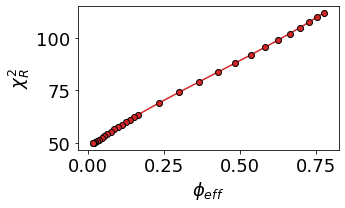

In [32]:
rw.plot_phix2r(-1)
phi_onlynmr = np.copy( rw.phi )
chi2_onlynmr = np.copy( rw.chi )

In [33]:
rex    = 'data/different_ff/nmr_nonmr.npy'
rmd    = 'data/different_ff/md_nonmr.npy'

rw = absurder.ABSURDer( rex, rmd, thetas = thetas )
rw.load_results('weights/different_ff/different_ff_onlynmr.pkl')

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  28
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 162.79
# Average shift:      0.24


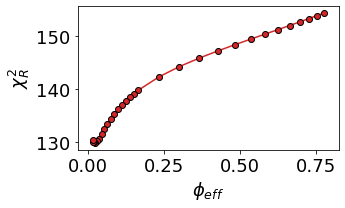

In [34]:
rw.plot_phix2r(-1)
phi_nonmr = np.copy( rw.phi )
chi2_nonmr = np.copy( rw.chi )

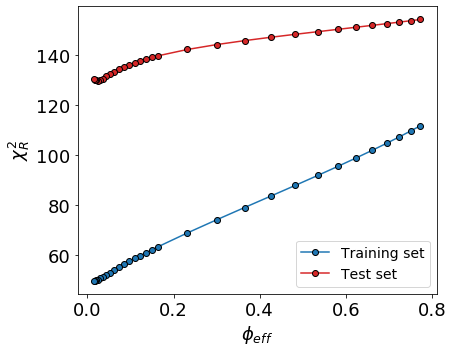

In [35]:
plt.figure( figsize = (6.4, 5) )
plt.plot( phi_onlynmr, chi2_onlynmr, 'o-', markeredgecolor = 'k', label = 'Training set' )
plt.plot( phi_nonmr,   chi2_nonmr,   'o-', markeredgecolor = 'k', label = 'Test set', c = 'tab:red',  )

plt.xlabel(r'$\phi_{eff}$')
plt.ylabel(r'$\chi^2_R$')
plt.legend()
plt.tight_layout()

## Experimental Data


# INFO ON THE DATASET
# Number of methyls:  72
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 130.10
# Average shift:      0.24


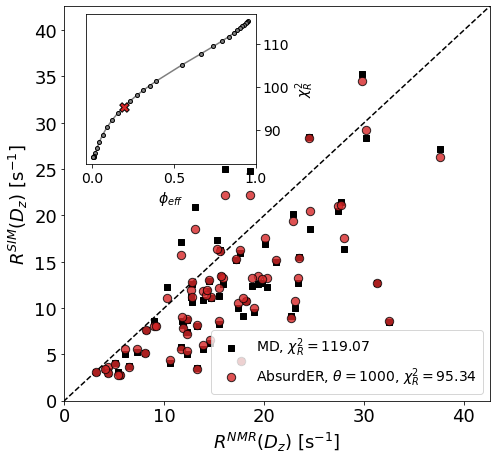

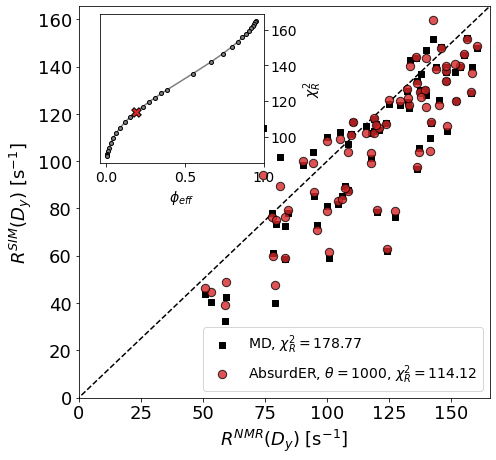

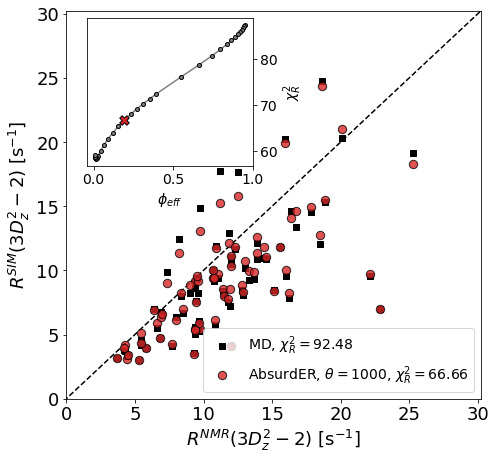

In [36]:
rex    = f'data/experimental/nmr_rates.npy'
eex    = f'data/experimental/nmr_errors.npy'
rmd    = f'data/experimental/md.npy'
mlist  = 'methyls_lists/methyls_nmr.pkl'
out    = "experimental_results"
ala146 = [4]

rw = absurder.ABSURDer( rex, rmd, eex, out = out, thetas = thetas, idx = ala146, methyl_list = mlist )

#rw.reweight( -1 )
rw.load_results('weights/experimental/experimental.pkl')

opt_theta = rw.ths[-12]
for i in range(rw.r):
    rw.plot_comparison( i, opt_theta, labels[i] )

In [37]:
opt_weights = rw.res[opt_theta]

traj1 = np.sum( opt_weights[:500] )
traj2 = np.sum( opt_weights[501:1000] )
traj3 = np.sum( opt_weights[1001:1500] )

print( f'{traj1:.2f}, {traj2:.2f}, {traj3:.2f}' )

0.38, 0.28, 0.34


### Residue specific RMSD Supplementary Figure

In [38]:
ala = []
ile = []
leu = []
met = []
val = []

for n, m in enumerate(rw.mnl):
    if 'ALA' in m:
        ala.append( n )
    elif 'ILE' in m:
        ile.append( n )
    elif 'LEU' in m:
        leu.append( n )
    elif 'MET' in m:
        met.append( n )
    elif 'VAL' in m:
        val.append( n )

res_list    = [ ala, ile, leu, met, val ]
names       = [ 'ALA', 'ILE', 'LEU', 'MET', 'VAL' ]
chi2_before = []
chi2_after  = []

for n,res in enumerate(res_list):
    
    tmp = []
    for r in range( rw.r ):
        diff = 0
        for m in res:
            diff += ( rw.rav[r][m] - rw.rex[r][m] )**2 / ( rw.eex[r][m]**2 + rw.emd[r][m]**2 ) / len(res)
        tmp.append( diff )
    chi2_before.append( tmp )
    
    tmp = []
    rrw = np.average( rw.rmd, weights = rw.res[rw.ths[-12]], axis = -1 )
    for r in range( rw.r ):
        diff = 0
        for m in res:
            diff += ( rrw[r][m] - rw.rex[r][m] )**2 / ( rw.eex[r][m]**2 + rw.emd[r][m]**2 ) / len(res)
        tmp.append( diff )
    chi2_after.append( tmp )

In [39]:
chi2_after_all = np.copy( chi2_after )

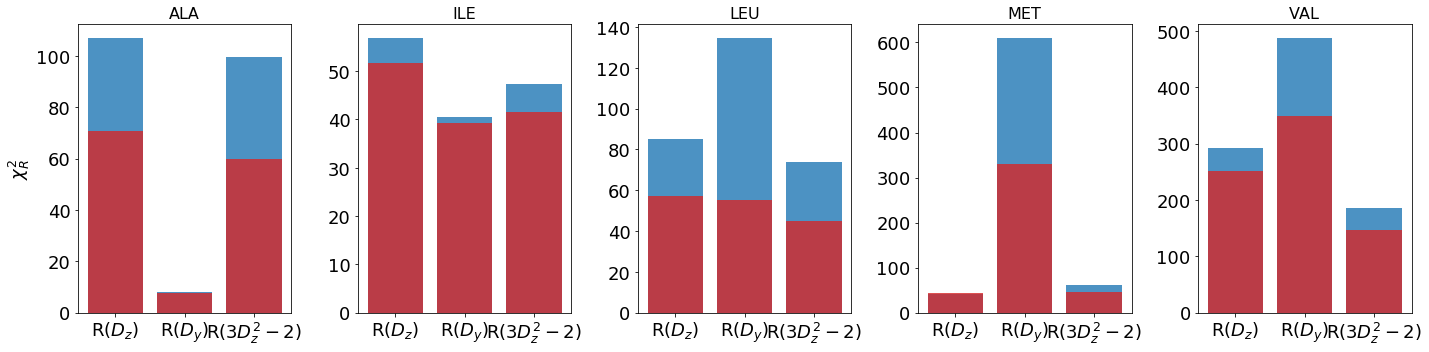

In [40]:
plt.figure( figsize = (20,5) )
lbls = [ 'R' + l for l in labels ]

for i,n in enumerate( names ):
    plt.subplot( 1, 5, i+1)
    plt.title( n, fontsize = 16 )
    plt.bar( lbls, chi2_before[i], alpha = 0.8 )
    plt.bar( lbls, chi2_after[i],  alpha = 0.8, color = 'tab:red' )
    if i == 0:
        plt.ylabel(r'$\chi^2_R$')
plt.tight_layout()
plt.savefig( 'chi2_residue_specific.pdf', format = 'pdf')

### Rate Distribution Functions

In order to reproduce the remaining pictures in Fig. 4 in the paper, we can employ the `plot_rate_distributions()` function.

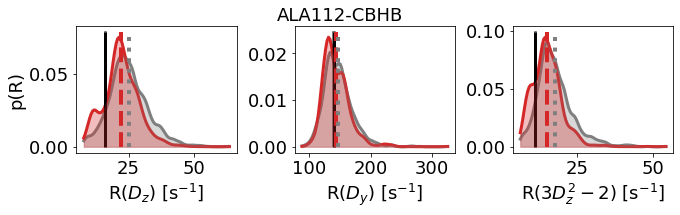

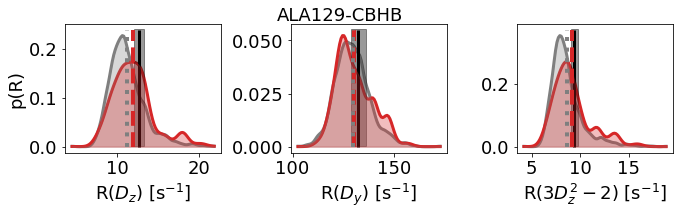

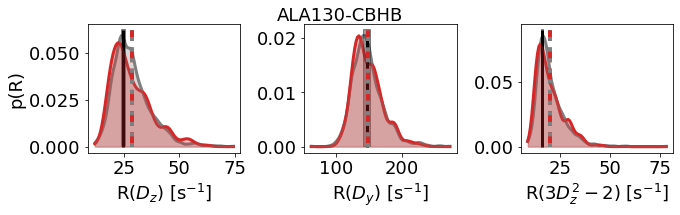

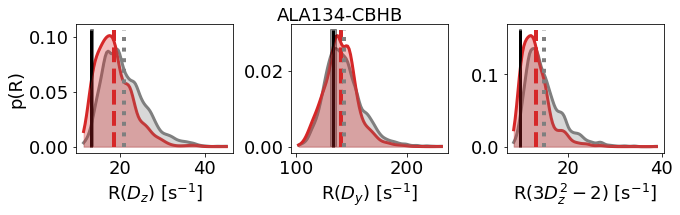

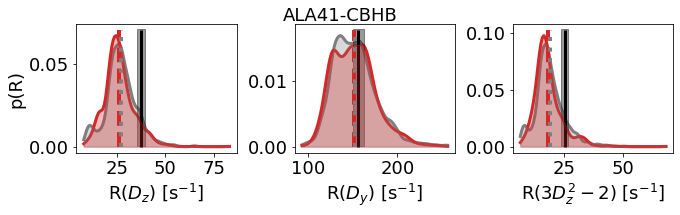

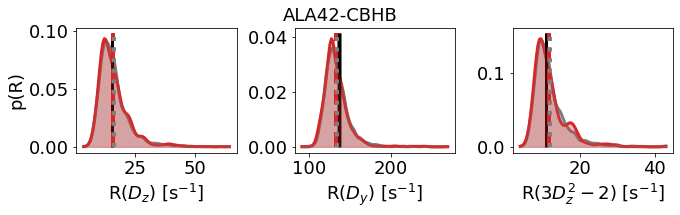

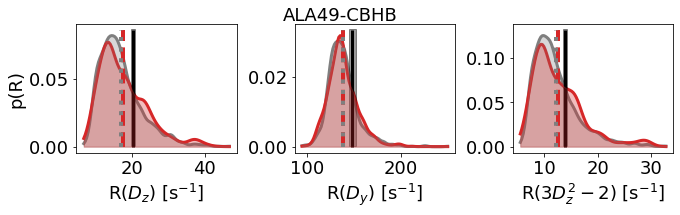

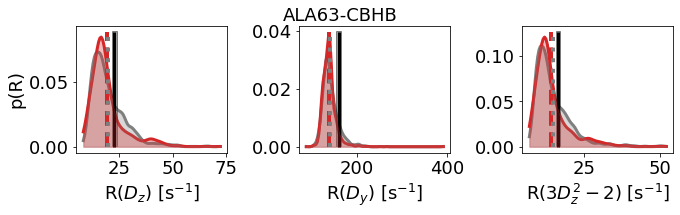

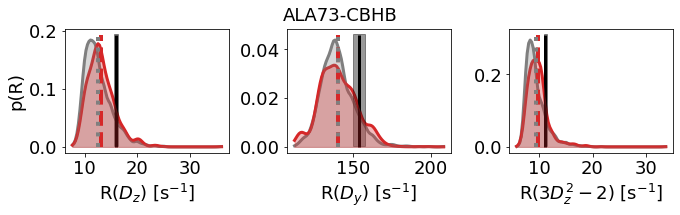

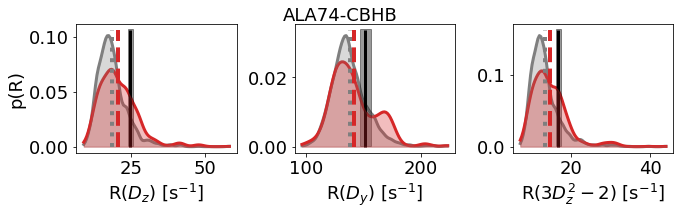

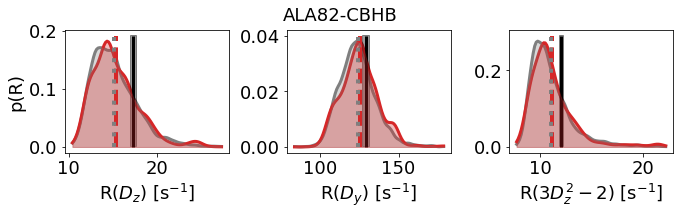

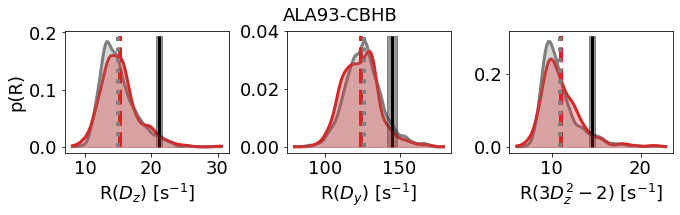

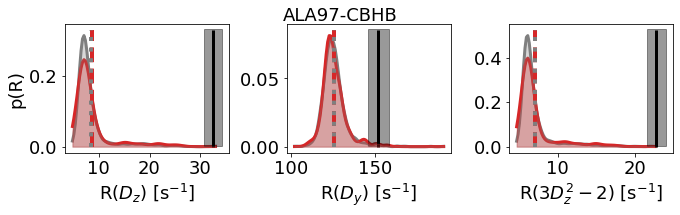

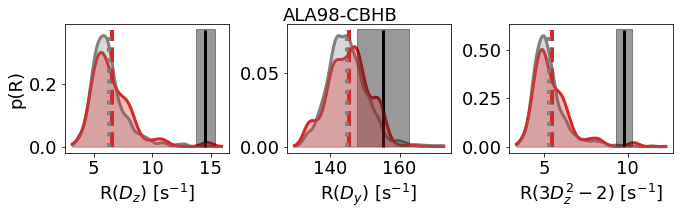

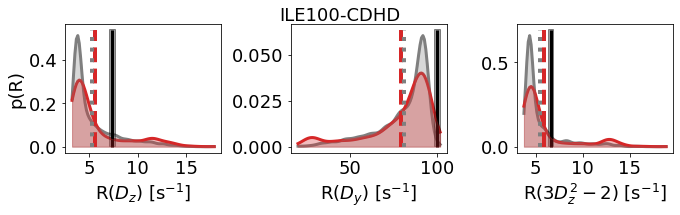

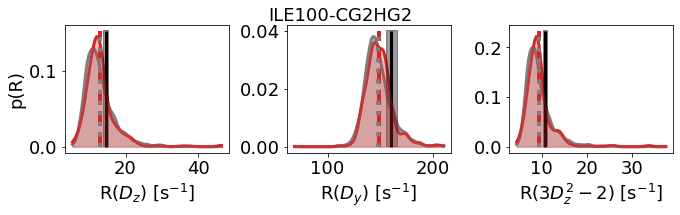

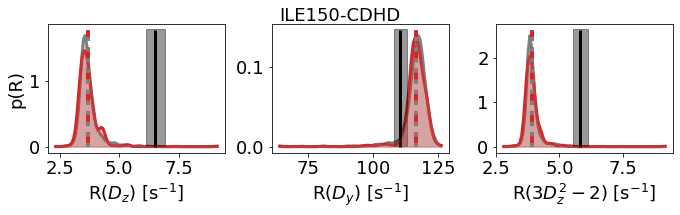

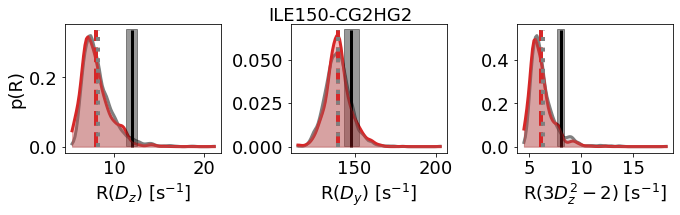

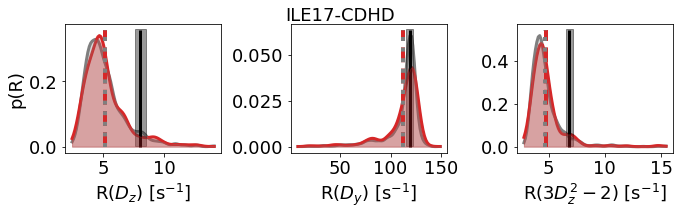

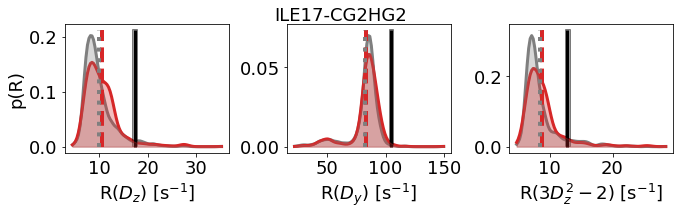

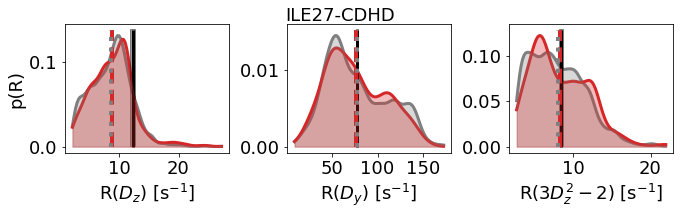

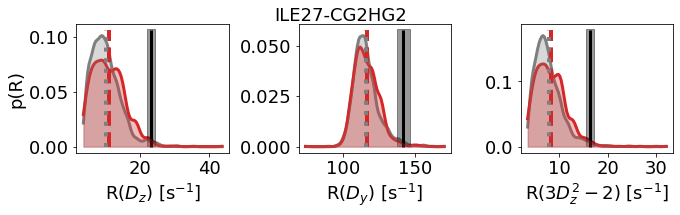

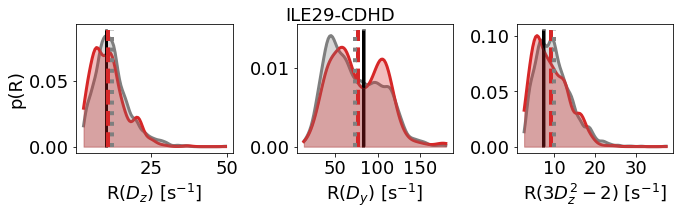

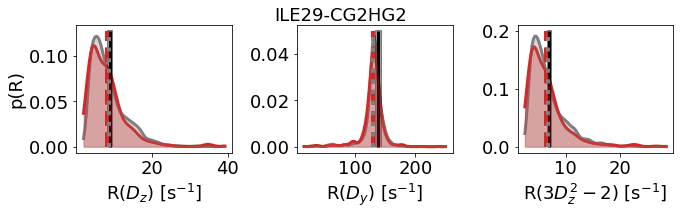

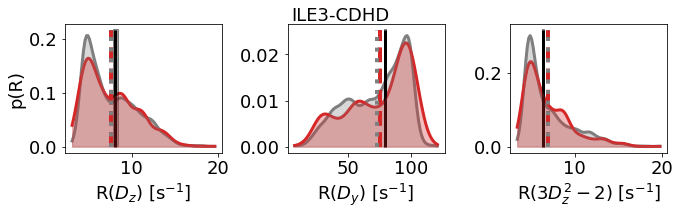

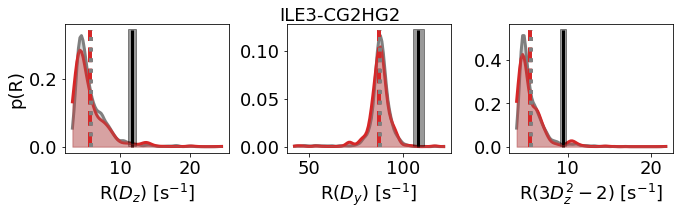

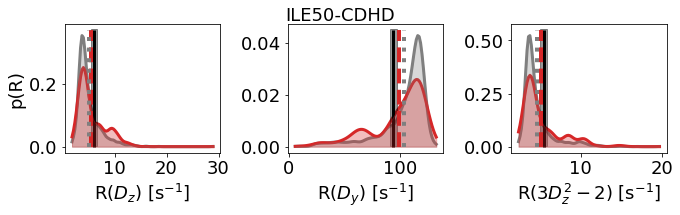

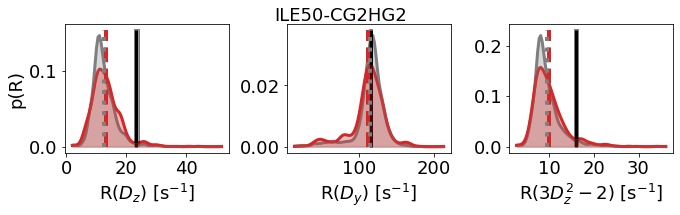

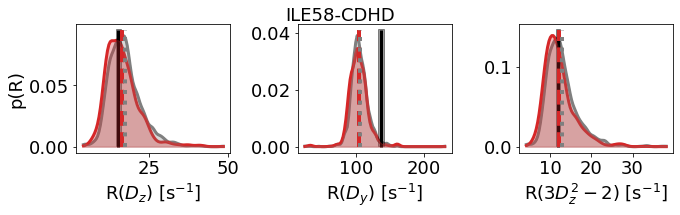

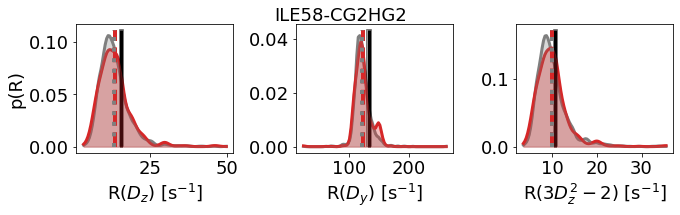

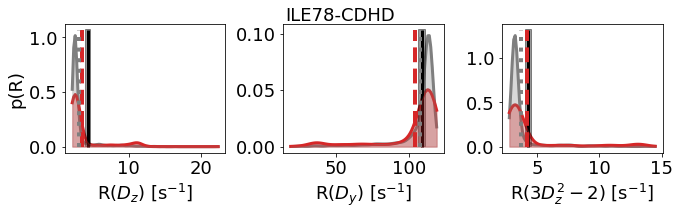

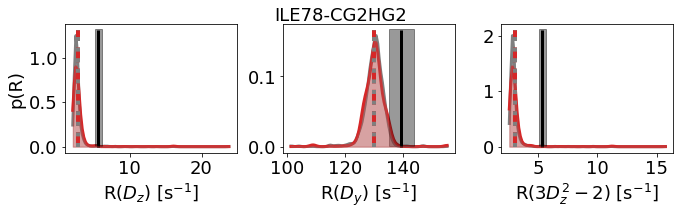

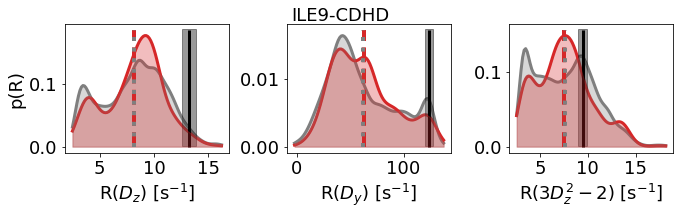

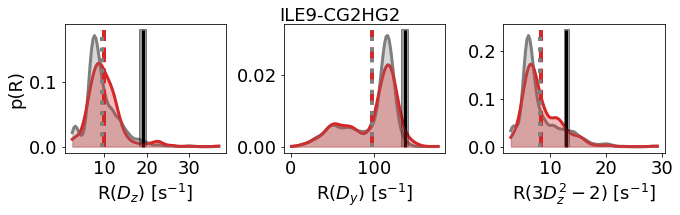

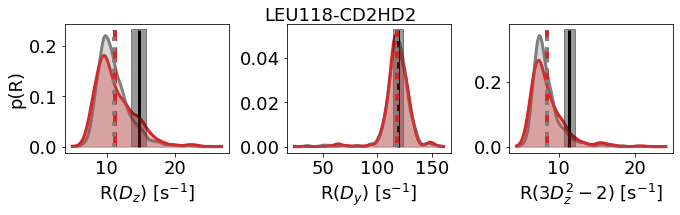

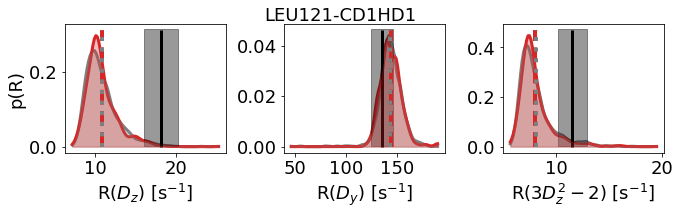

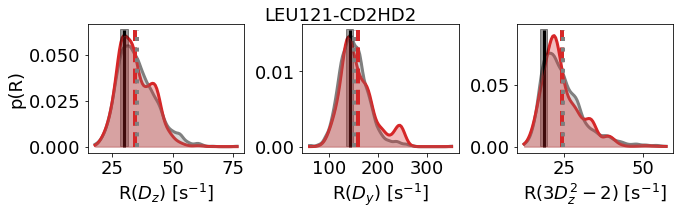

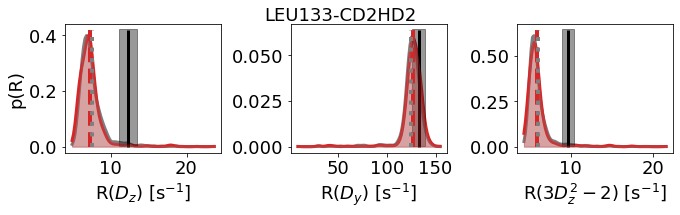

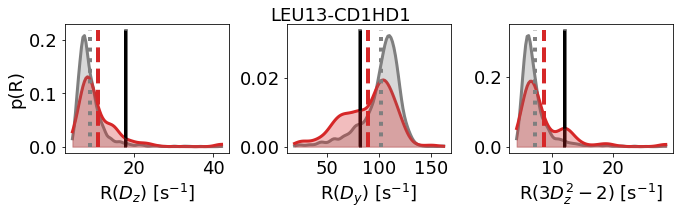

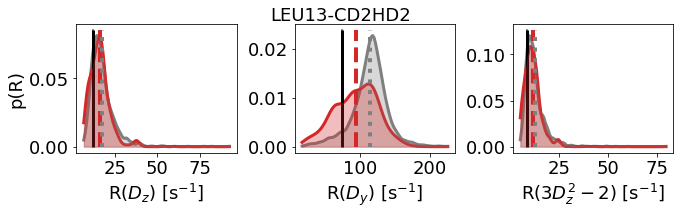

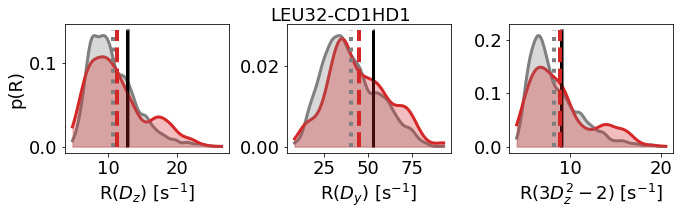

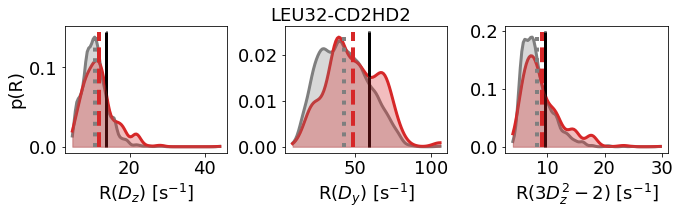

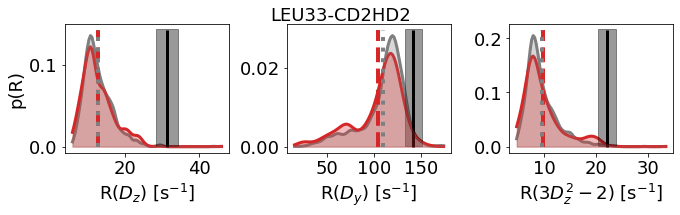

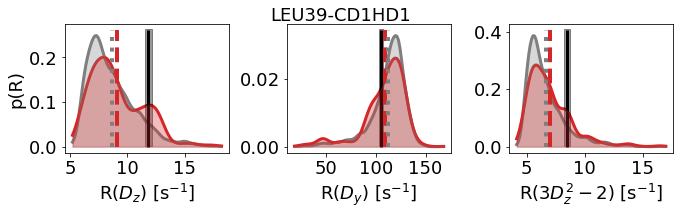

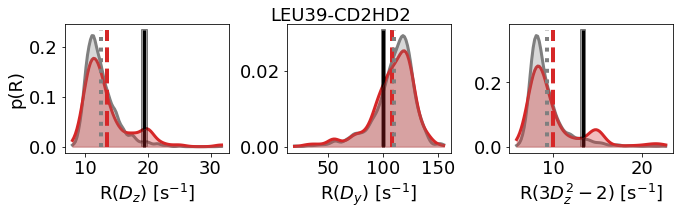

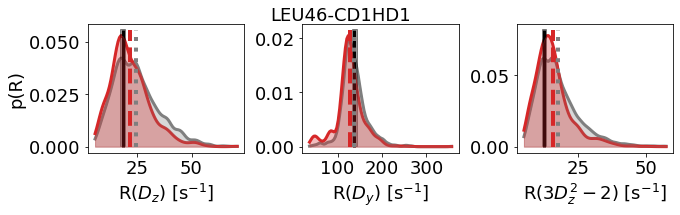

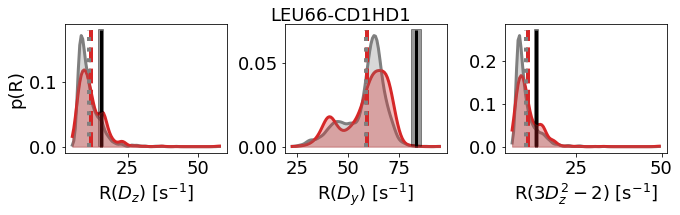

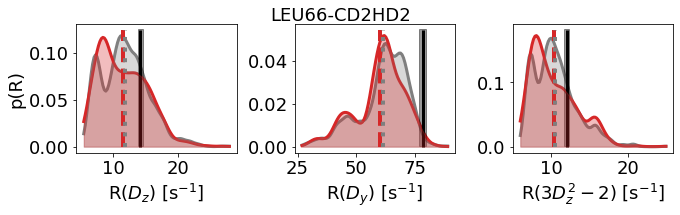

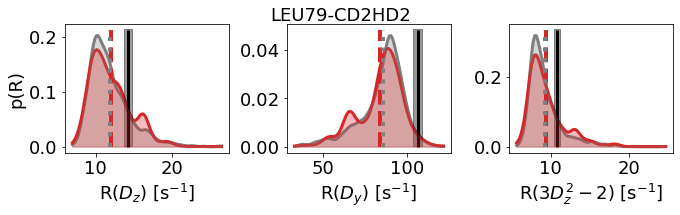

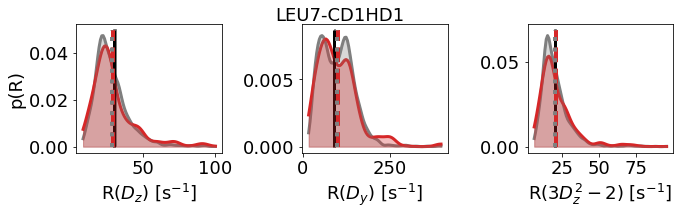

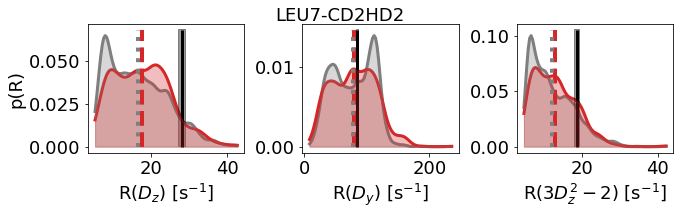

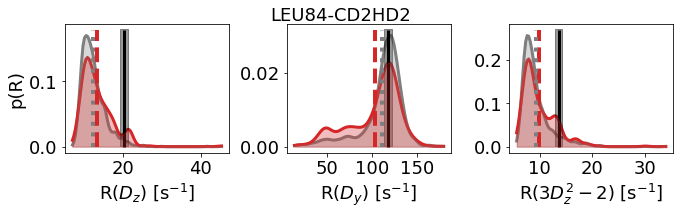

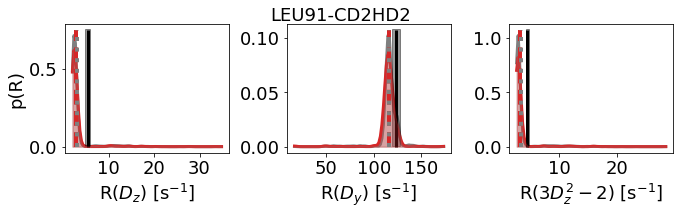

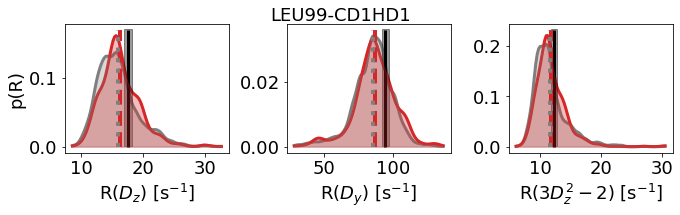

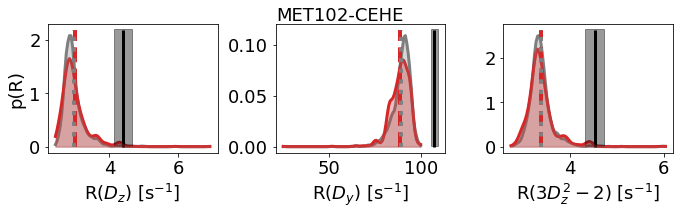

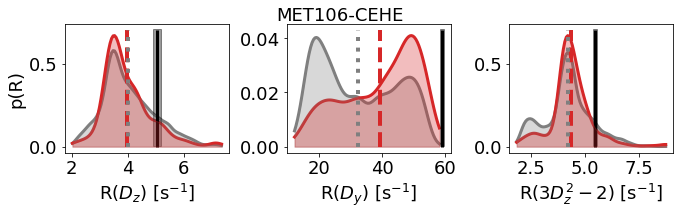

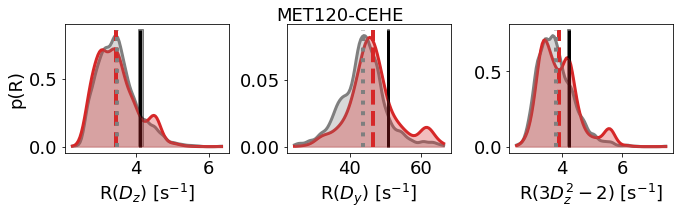

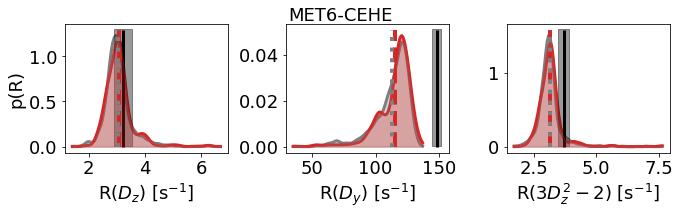

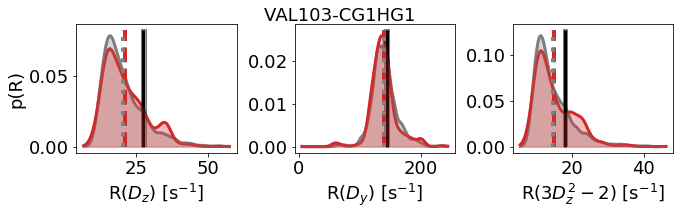

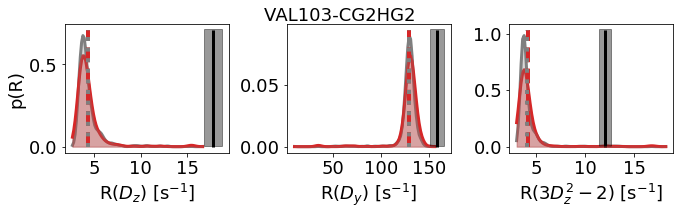

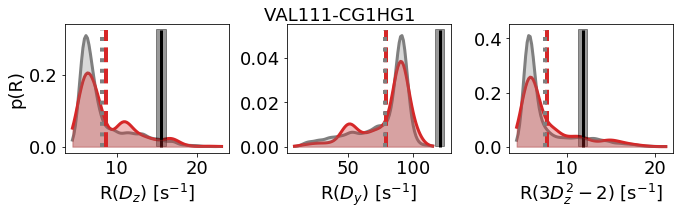

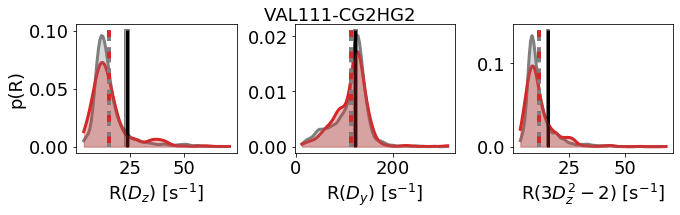

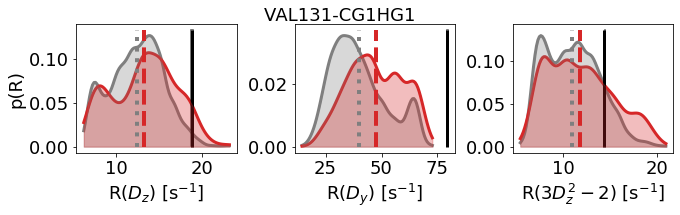

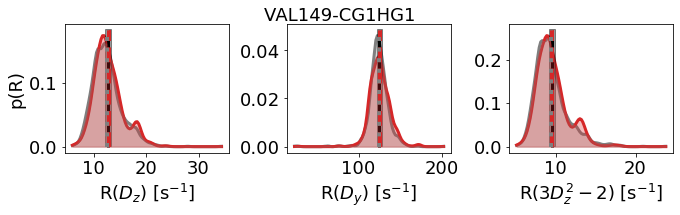

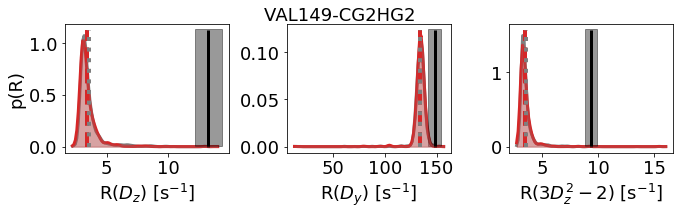

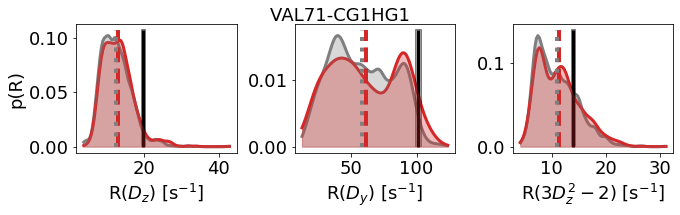

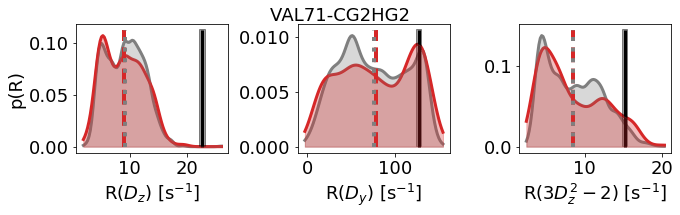

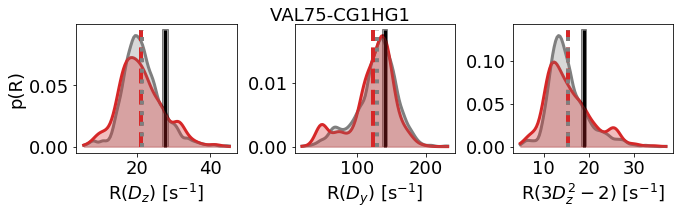

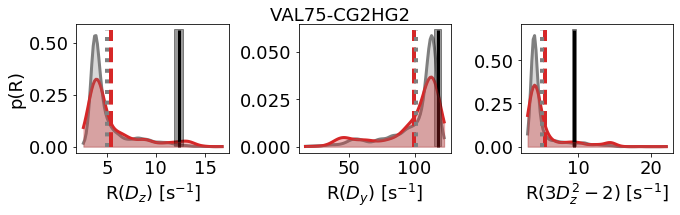

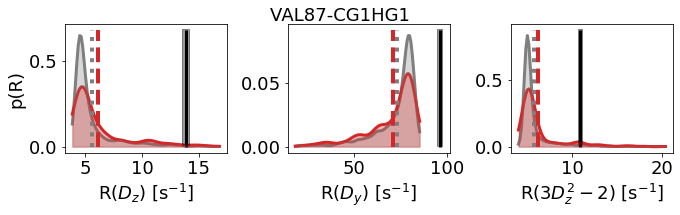

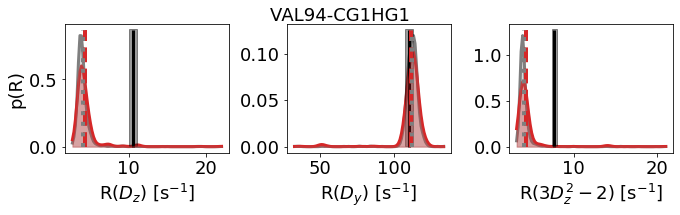

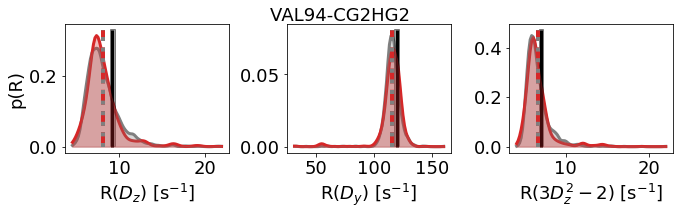

In [41]:
for i in range(rw.m):
    rw.plot_rate_distributions(i, opt_theta=opt_theta, rate_labels=labels)

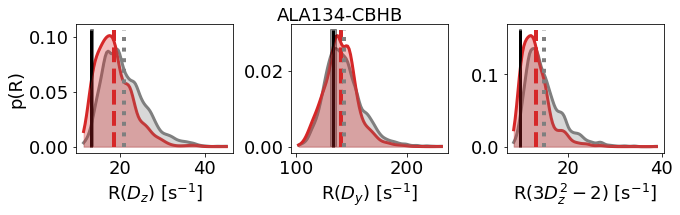

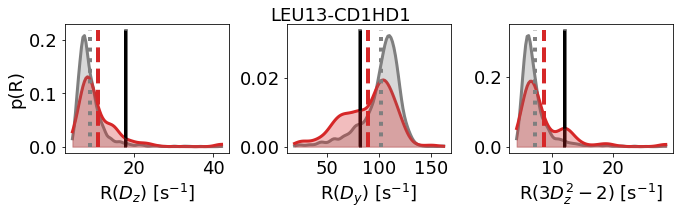

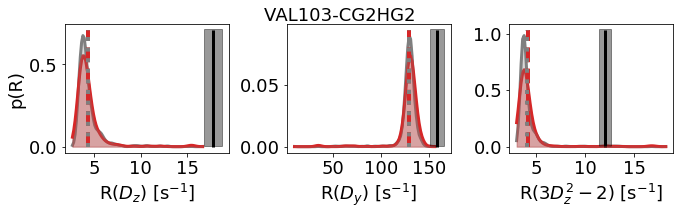

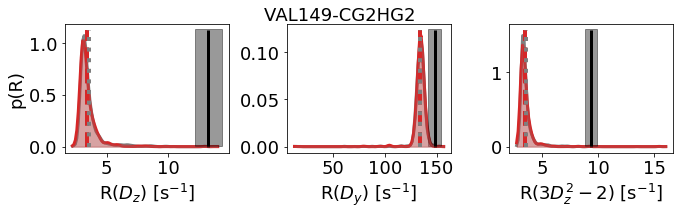

In [42]:
rw.plot_rate_distributions( 3,   opt_theta = opt_theta, rate_labels = labels )
rw.plot_rate_distributions( 38,  opt_theta = opt_theta, rate_labels = labels )
rw.plot_rate_distributions( -13, opt_theta = opt_theta, rate_labels = labels )
rw.plot_rate_distributions( -8,  opt_theta = opt_theta, rate_labels = labels )

### Sampling

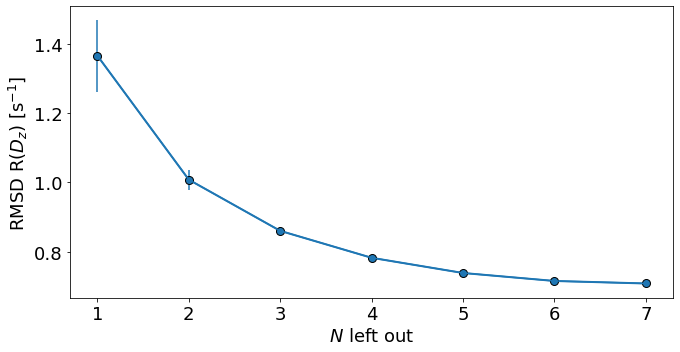

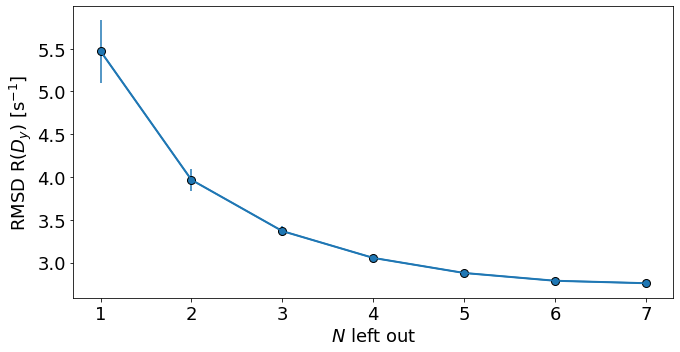

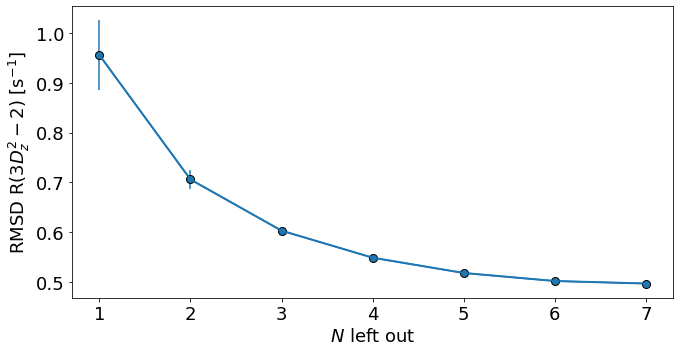

In [43]:
for r in range(3):
    rw.evaluate_sampling( 100, r, labels[r], outfig = f'leave_N_out_{r}' )

### Reweighting against subset of rates

In [44]:
results1 = [ 1, 2, 3, 12, 13, 23 ]
lbl1     = [ r'R($D_z$)', r'R($D_y$)', r'R($3D_z^2-2$)']
results2 = [ '_R1', '_R2', '_R3', '_R12', '_R13', '_R23', '' ]
lbl2     = [ r'R($D_z$)', r'R($D_y$)', r'R($3D_z^2-2$)', r'R($D_z$), R($D_y$)', r'R($D_z$), R($3D_z^2-2$)',
            r'R($D_y$), R($3D_z^2-2$)', r'R($D_z$), R($D_y$)'] 
datasets = [ 'same_ff', 'different_ff', 'experimental']
rexs     = [ f'data/same_ff/nmr.npy', f'data/different_ff/nmr.npy', f'data/experimental/nmr_rates.npy' ]
rmds     = [ f'data/same_ff/md.npy', f'data/different_ff/md.npy', f'data/experimental/md.npy' ]
eexs     = [ '', '', f'data/experimental/nmr_errors.npy' ]
ala146s  = [ [14], [14], [4] ]
ylims    = [ (-1,21), (35,180), (30,215) ]

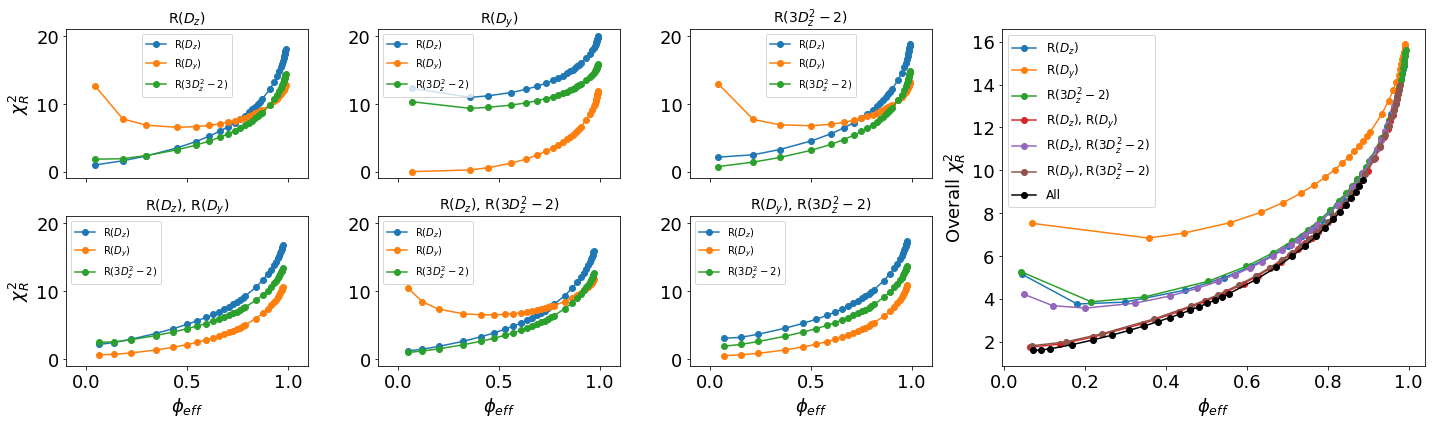

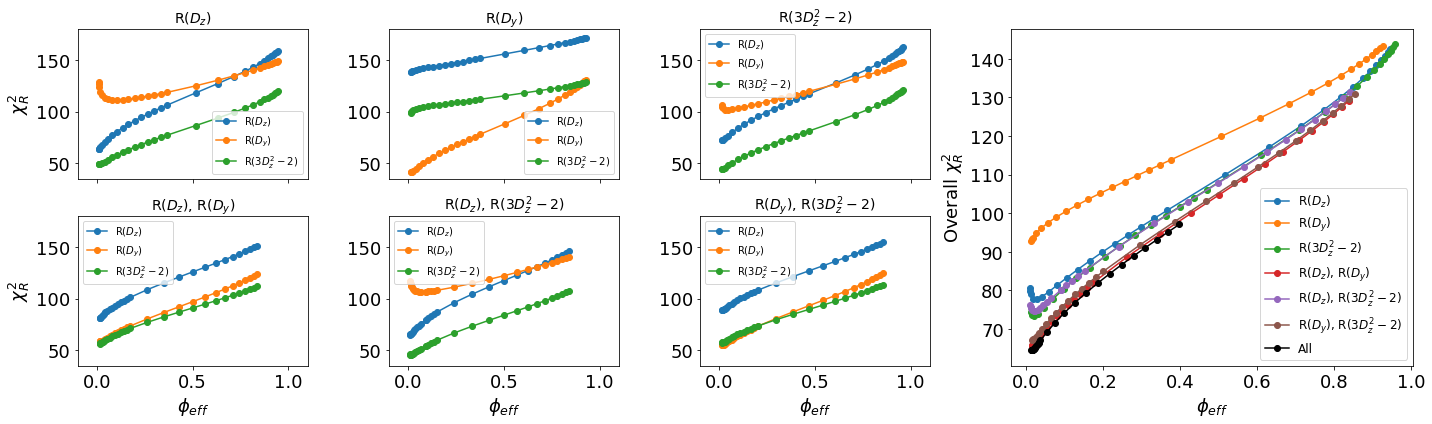

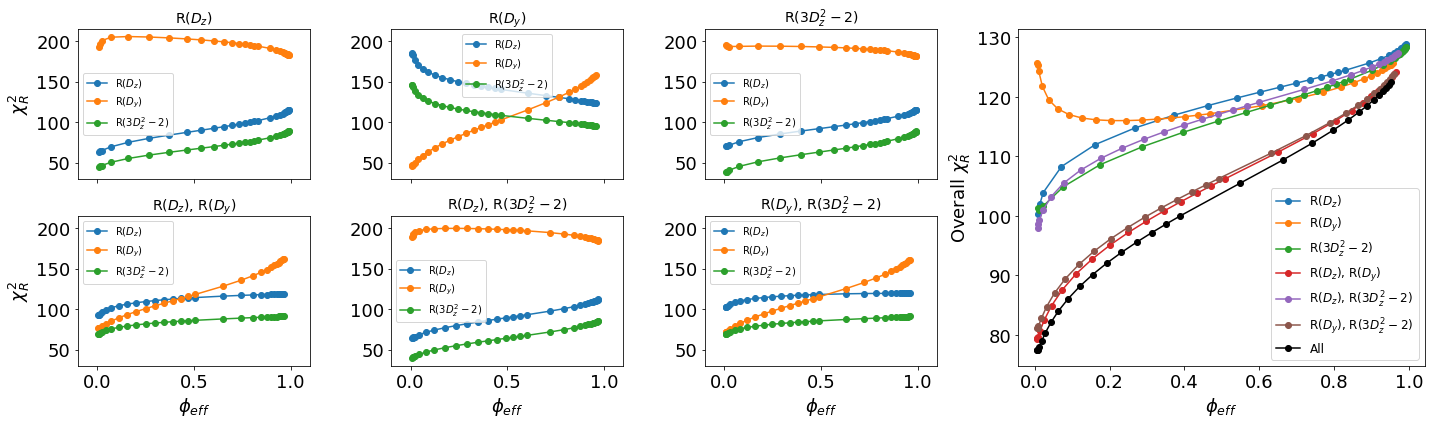

In [45]:
for k in range(3):

    fig = plt.figure(constrained_layout = False, figsize = (20,6) )
    gs  = fig.add_gridspec( nrows = 2, ncols = 4, width_ratios = [0.2, 0.2, 0.2, 0.35] )

    n = 0
    for i in range(2):
        for j in range(3):
            ax = fig.add_subplot(gs[i,j])

            rw = absurder.ABSURDer( rexs[k], rmds[k], eexs[k], idx = ala146s[k], verbose = False )
            rw.load_results(f'weights/{datasets[k]}/{datasets[k]}_R{results1[n]}.pkl')

            ax.set_title(lbl2[n], fontsize = 14 )

            x = []
            for r in range(3):
                rw.phix2r( r )
                phi = rw.phi
                x.append( rw.chi )

            m = 0
            for r in range(3):
                ax.plot( phi, x[r], 'o-', label = lbl1[m] )
                ax.set_ylim( ylims[k] )
                ax.set_xlim((-0.1,1.1))
                m += 1

            n += 1
            if i != 1:
                ax.xaxis.set_major_formatter(plt.NullFormatter())
            else:
                ax.set_xlabel(r'$\phi_{eff}$')

            if j == 0:
                ax.set_ylabel(r'$\chi^2_R$')

            ax.legend( fontsize = 10 )

    ax = fig.add_subplot(gs[:,3])

    j = 0
    for res in results2:
        rw.load_results(f'weights/{datasets[k]}/{datasets[k]}{res}.pkl')

        rw.phix2r( -1 )
        if res == '':
            ax.plot( rw.phi, rw.chi, 'o-', c ='k', label = 'All' )
        else:
            plt.plot( rw.phi, rw.chi, 'o-', label = lbl2[j] )
        j += 1
        plt.xlabel(r'$\phi_{eff}$')
        plt.ylabel(r'Overall $\chi^2_R$')

    plt.legend( fontsize = 12 )
    plt.tight_layout()
    plt.savefig(f'{datasets[k]}.pdf', format = 'pdf')

### Quantile threshold

In [46]:
def arg_quantile( h, q ):
    sh = np.sort(h)
    idx = q * (len(sh) - 1)
    idx = int(idx + 0.5)
    idx = np.argpartition(sh, idx)[idx]
    
    return idx

In [47]:
def random_methyls(absurd, n):
    L = len(absurd.mnl)
    methyl_indices = np.random.choice(np.arange(0,L,1), n-1, replace=True)
    exp = np.copy(absurd.rex)[:,methyl_indices]
    err = np.copy(absurd.eex)[:,methyl_indices]
    md_ = np.copy(absurd.rmd)[:,methyl_indices,:]
        
    return exp, err, md_, methyl_indices

In [48]:
rex    = f'data/experimental/nmr_rates.npy'
eex    = f'data/experimental/nmr_errors.npy'
rmd    = f'data/experimental/md.npy'
mlist  = 'methyls_lists/methyls_nmr.pkl'
ala146 = [4]

rw = absurder.ABSURDer(rex, rmd, eex, idx=ala146, verbose=False, methyl_list=mlist)

We filter out the methyls whose experimental rates do not fall within a given quantile of the simulated rate distributions. We repeat this for several quantiles. 

In [49]:
bins = 100
methyls = {0.95:[], 0.9:[], 0.85:[], 0.8:[], 0.75:[], 0.7:[], 0.65:[], 0.6:[], 0.55:[], 0.5:[]}
for k in methyls.keys():
    for idx in range(rw.m):
        keep = []
        for r in range(3):
            h, _ = np.histogram(rw.rmd[r][idx], bins=bins, density=True)
            x = np.linspace(rw.rmd[r, idx, :].min(), rw.rmd[r, idx, :].max(), num=bins)
            quant = arg_quantile(h, k)
            keep.append(rw.rex[r][idx] < x[quant])
        if np.sum(keep) == 3:
            methyls[k].append(idx)

We generate multiple sets of random control sets having the same dimension of the quantile filtered sets. Re-running the cell will modify the datasets and force you to re-run reweighting. 

In [50]:
# for k in methyls.keys():
#     for i in range(5):
#         rexp, rerr, rmd, mindices = random_methyls(rw, len(methyls[k]))
#         np.save(f"data/quantiles/exp/q{k}_r{i+1}.npy", rexp)
#         np.save(f"data/quantiles/md/q{k}_r{i+1}.npy", rmd)
#         np.save(f"data/quantiles/err/q{k}_r{i+1}.npy", rerr)

In [51]:
rel_chis = []
for k in methyls.keys():
    exp = np.copy(rw.rex[:,methyls[k]])
    err = np.copy(rw.eex[:,methyls[k]])
    md_ = np.copy(rw.rmd[:,methyls[k],:])
    
    rw_ = absurder.ABSURDer(exp, md_, err, idx=ala146, verbose=False, methyl_list=mlist)
    rw_.load_results(f'weights/quantiles/quantile_{k}.pkl')
    rw_.phix2r(-1)
    opt_theta = rw_.get_theta_idx(0.2)
    chi2 = rw_.chi[opt_theta]
    ichi2 = rw_.ix2[-1]
    rel = (ichi2-chi2)/ichi2*100
    rel_chis.append(rel)
rel_chis.insert(0,29.3)
quantiles = [i*100 for i in list(methyls.keys())]
number = [len(methyls[i]) for i in methyls.keys()]
quantiles.insert(0,100)
number.insert(0,72)

In [52]:
rand_av, rand_err = [], [] 
for q in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    rels = []
    for r in range(2,5):
        out = f'weights/quantiles/q{q}_r{r}.pkl'
        rex = f'data/quantiles/exp/q{q}_r{r}.npy'
        eex = f'data/quantiles/err/q{q}_r{r}.npy'
        rmd = f'data/quantiles/md/q{q}_r{r}.npy'
        # create reference dataset
        rw = absurder.ABSURDer(rex, rmd, eex, methyl_list=mlist, verbose=False)
        rw.load_results(out)
        # compute phi vs chi2, select optimal theta and compute relative changes to chi2 upon reweighting
        rw.phix2r(-1)
        opt_theta = rw.get_theta_idx(0.2)
        chi2 = rw.chi[opt_theta]
        ichi2 = rw.ix2[-1]
        rel = (ichi2-chi2)/ichi2*100
        rels.append(rel)
    rand_av.append(np.average(rels))
    rand_err.append(np.std(rels)/np.sqrt(len(rels)))

This reproduced Fig. 6B in the paper.

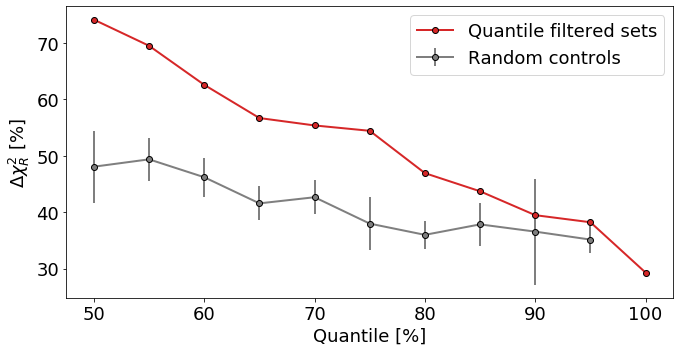

In [53]:
plt.figure( figsize = ( 9.55, 5 ) )
plt.plot(quantiles, rel_chis, 'o-', c='tab:red', markeredgecolor='k', lw=2, label='Quantile filtered sets')
plt.errorbar(quantiles[1:], np.flip(rand_av), yerr=rand_err, marker='o', c='tab:grey', 
             markeredgecolor='k', lw=2, label='Random controls')
plt.xlabel('Quantile [%]')
plt.ylabel(r'$\Delta \chi^2_R$ [%]')
plt.legend()
plt.tight_layout();

### Methyl specific reweighting

We can isolate each methyl type and reweight each sub-class separately. We first build the different datasets. 

In [54]:
rex = f'data/experimental/nmr_rates.npy'
eex = f'data/experimental/nmr_errors.npy'
rmd = f'data/experimental/md.npy'
mlist = 'methyls_lists/methyls_nmr.pkl'
out = "experimental_results"
ala146 = [4]
rw = absurder.ABSURDer(rex, rmd, eex, out=out, thetas=thetas, idx=ala146, methyl_list=mlist, verbose=False)

methyl_specific = {'CBHB':[], 'CDHD':[], 'CG2HG2':[], 'CD2HD2':[], 'CD1HD1':[], 'CEHE':[], 'CG1HG1':[]}

for k in methyl_specific.keys():
    for i,m in enumerate(rw.mnl):
        if k in m:
            methyl_specific[k].append(i)
            
methyl_specific['CG2HG2_I'] = [15, 17, 19, 21, 23, 25, 27, 29, 31, 33]
methyl_specific['CG2HG2_V'] = [59, 61, 64, 66, 68, 71]
methyl_specific['CDHD_I'] = [14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
methyl_specific['CDHD_L'] = [35, 38, 40, 43, 45, 46, 49, 53]
methyl_specific['CDHD'] = [14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 35, 38, 40, 43, 45, 46, 49, 53]
del methyl_specific['CD1HD1']

for k in methyl_specific.keys():
    exp = np.copy(rw.rex)
    exp = exp[:,methyl_specific[k]]
    np.save(f'data/methyl_specific/nmr/{k}.npy', exp)
    
    err = np.copy(rw.eex)
    err = err[:,methyl_specific[k]]
    np.save(f'data/methyl_specific/err/{k}.npy', err)
    
    md_ = np.copy(rw.rmd)
    md_ = md_[:,methyl_specific[k],:]
    np.save(f'data/methyl_specific/md/{k}.npy', md_)

In [55]:
lconv = {
        'CBHB':r'$C^\beta H^\beta$', 'CDHD':r'$C^\delta H^\delta$', 'CG2HG2':r'$C^{\gamma 2} H^{\gamma 2}$', 
        'CD2HD2':r'$C^{\delta 2} H^{\delta 2}$', 'CEHE':'$C^\epsilon H^\epsilon$', 
        'CG1HG1':r'$C^{\gamma 1} H^{\gamma 1}$', 'CG2HG2_I':r'$C^{\gamma 2} H^{\gamma 2}$ (I)', 
        'CG2HG2_V':r'$C^{\gamma 2} H^{\gamma 2}$ (V)', 'CDHD_I':r'$C^\delta H^\delta$ (I)', 
        'CDHD_L':r'$C^\delta H^\delta$ (L)'
        } #list of all labels

After reweighting, we compute the $\chi^2_R$ aginst experiments for each class of methyls separately and compare it with the MD results and the ones obtained by the global fit using all the protein methyls simultaneously. 

In [56]:
results = dict.fromkeys(methyl_specific)
nr_methyls = []
for k in methyl_specific.keys():
    if k == 'CBHB':
        ala146 = [4]
    else:
        ala146 = []
    rex = f'data/methyl_specific/nmr/{k}.npy'
    eex = f'data/methyl_specific/err/{k}.npy'
    rmd = f'data/methyl_specific/md/{k}.npy'
    weights = f'weights/methyl_specific/{k}.pkl'
    rw = absurder.ABSURDer(rex, rmd, eex, thetas=thetas, idx=ala146, verbose=False)
    rw.load_results(weights)
    rw.phix2r(-1)
    opt_theta = rw.get_theta_idx(0.2)
    chi2 = rw.chi[opt_theta]
    inichi2 = rw.ix2[-1]
    nr_methyls.append(rw.m)
    
    rw = absurder.ABSURDer(rex, rmd, eex, thetas=thetas, idx=ala146, verbose=False)
    rw.load_results('weights/experimental/experimental.pkl')
    rw.phix2r(-1)
    opt_theta = rw.get_theta_idx(0.2)
    chi2_global = rw.chi[opt_theta]
    
    results[k] = [inichi2, chi2, chi2_global]

This reproduces Fig. 6A in the paper. 

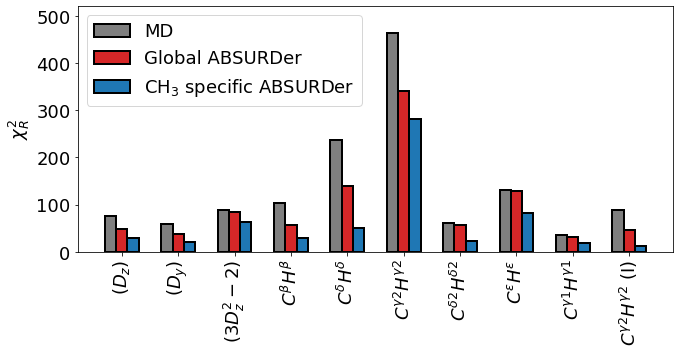

In [57]:
plt.figure(figsize=(9.55, 5))
x = np.arange(0,10,1)
chis_a, chis_b, chis_c = [], [], []
for k,l in results.items():
    labels.append(lconv[k]) #key
    chis_b.append(l[0]) #delta chi
    chis_a.append(l[1])
    chis_c.append(l[2]) #chi2 from global fitting
        
plt.bar(x-0.2, chis_b, width=0.2, edgecolor='k', linewidth=2, color='tab:grey', label='MD')
plt.bar(x, chis_c, width=0.2, edgecolor='k', linewidth=2, color='tab:red', label='Global ABSURDer')
plt.bar(x+0.2, chis_a, width=0.2, edgecolor='k', linewidth=2, color='tab:blue', label=r'CH$_3$ specific ABSURDer')

plt.xticks(x, labels, rotation='vertical')
plt.ylabel(r'$\chi^2_R$')
plt.ylim((0,520))
plt.legend(loc=2)
plt.tight_layout();

In [58]:
def cross_validation():
    cross_val = dict.fromkeys(methyl_specific)
    for idx in methyl_specific.keys():
        cross_val[idx] = dict.fromkeys(methyl_specific)
        for k in methyl_specific.keys():
            if k != idx:
                if k == 'CBHB':
                    ala146 = [4]
                else:
                    ala146 = []
                rex = f'data/methyl_specific/nmr/{k}.npy'
                eex = f'data/methyl_specific/err/{k}.npy'
                rmd = f'data/methyl_specific/md/{k}.npy'
                weights = f'weights/methyl_specific/{idx}.pkl'
                rw = absurder.ABSURDer(rex, rmd, eex, thetas=thetas, idx=ala146, verbose=False)
                rw.load_results(weights)
                rw.phix2r(-1)
                opt_theta = rw.get_theta_idx(0.2)
                chi2 = rw.chi[opt_theta]
                cross_val[idx][k] = (rw.ix2[-1]-chi2)/rw.ix2[-1]*100
            else:
                cross_val[idx][k] = None    
    return cross_val

We can quantify the impact of reweighting a specific class of methyls on the other sets which have not been reweighted through cross-calidation. 

In [59]:
crossval = cross_validation()

This reproduces Fig. S9 in the paper. 

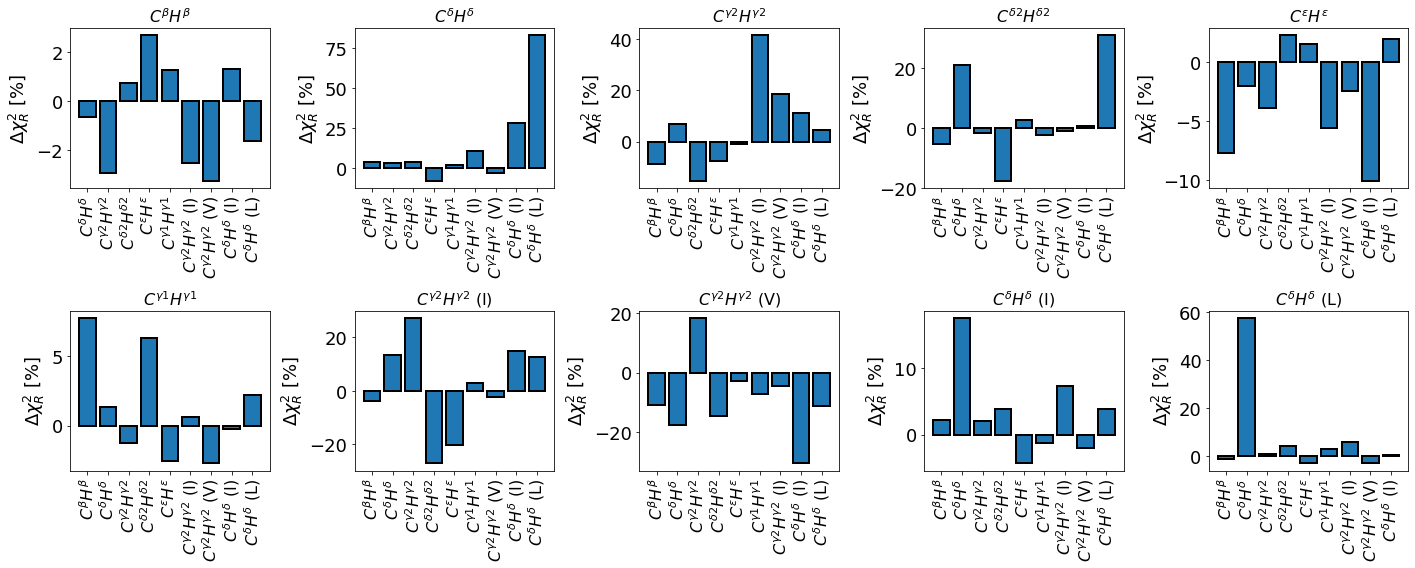

In [60]:
plt.figure(figsize=(20,8))
x = np.arange(0,9,1)
for n,idx in enumerate(methyl_specific.keys()):
    chis = []
    labels = []
    for k,l in crossval[idx].items():
        if l != None:
            labels.append(lconv[k]) #key
            chis.append(l) #delta chi
    plt.subplot(2,5,n+1)
    plt.title(lconv[idx], fontsize=16)
    plt.bar(x, chis, edgecolor='k', linewidth=2)
    plt.xticks(x, labels, rotation='vertical', fontsize=16)
    plt.ylabel(r'$\Delta \chi^2_R$ [%]')
plt.tight_layout();